In [3]:
#importing libraries  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
  
#importing libraries for model building and evaluation 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
  
from sklearn.metrics import classification_report, confusion_matrix 

In [4]:
# loading the datasets 
data = pd.read_csv('Sarcasm.csv')
data = data.drop(['index','sarcasm','irony','satire','understatement','overstatement','rhetorical_question'],axis=1)
  
# Display data 
print(data.head()) 

                                               tweet  sarcastic
0  The only thing I got from college is a caffein...          1
1  I love it when professors draw a big question ...          1
2  Remember the hundred emails from companies whe...          1
3  Today my pop-pop told me I was not “forced” to...          1
4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      3467 non-null   object
 1   sarcastic  3468 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 54.3+ KB


C:\Users\qwekj\AppData\Local\Temp\ipykernel_23988\3977806891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sarcastic', data=data, palette="Set1").set_title(


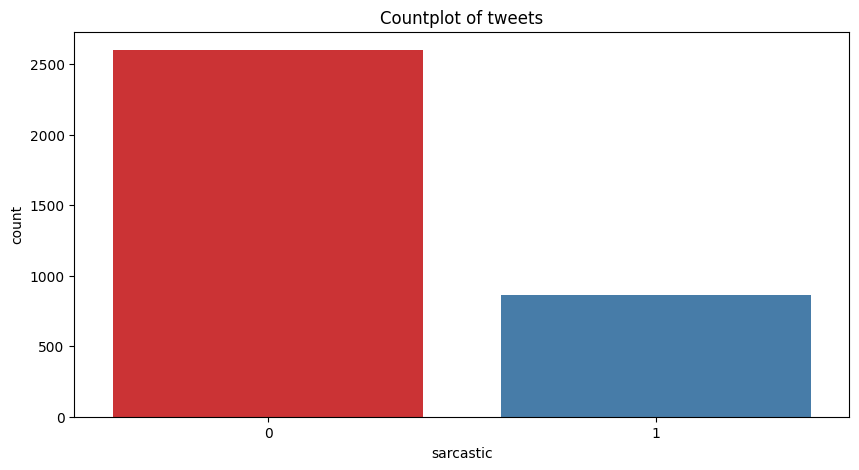

In [6]:
# Check the dataset label balance or not 
  
# Check number of tweets by sarcastic 
plt.figure(figsize=(10, 5)) 
sns.countplot(x='sarcastic', data=data, palette="Set1").set_title( 
    "Countplot of tweets") 
plt.show() 

In [7]:
stopwords_list = stopwords.words('english')

In [8]:
# Define a function to clean the text
def clean(text):
# Lowercase all letters, removes all mentions, special characters and numericals leaving the alphabets
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    text = re.sub(r"#(\w+)", r"\1", text) # Removing just the "#" symbol from hashtags
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.lower()
    return text
    
data['tweet'] = data['tweet'].astype(str)
data['tweet'] = data['tweet'].apply(clean)
data.head()

,tweet,sarcastic
0,the only thing i got from college is a caffein...,1
1,i love it when professors draw a big question ...,1
2,remember the hundred emails from companies whe...,1
3,today my pop pop told me i was not forced to g...,1
4,i did too and i also reported cancun cruz not...,1


In [9]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS tagged'] = data['tweet'].apply(token_stop_pos)
data.head()

,tweet,sarcastic,POS tagged
0,the only thing i got from college is a caffein...,1,"[(thing, n), (got, v), (college, n), (caffeine..."
1,i love it when professors draw a big question ...,1,"[(love, v), (professors, n), (draw, v), (big, ..."
2,remember the hundred emails from companies whe...,1,"[(remember, v), (hundred, None), (emails, n), ..."
3,today my pop pop told me i was not forced to g...,1,"[(today, n), (pop, n), (pop, n), (told, v), (f..."
4,i did too and i also reported cancun cruz not...,1,"[(also, r), (reported, v), (cancun, n), (cruz,..."


In [10]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,tweet,sarcastic,POS tagged,Lemma
0,the only thing i got from college is a caffein...,1,"[(thing, n), (got, v), (college, n), (caffeine...",thing get college caffeine addiction
1,i love it when professors draw a big question ...,1,"[(love, v), (professors, n), (draw, v), (big, ...",love professor draw big question mark next a...
2,remember the hundred emails from companies whe...,1,"[(remember, v), (hundred, None), (emails, n), ...",remember hundred email company covid start g...
3,today my pop pop told me i was not forced to g...,1,"[(today, n), (pop, n), (pop, n), (told, v), (f...",today pop pop tell force go college okay sur...
4,i did too and i also reported cancun cruz not...,1,"[(also, r), (reported, v), (cancun, n), (cruz,...",also report cancun cruz worry heartbeat cons...


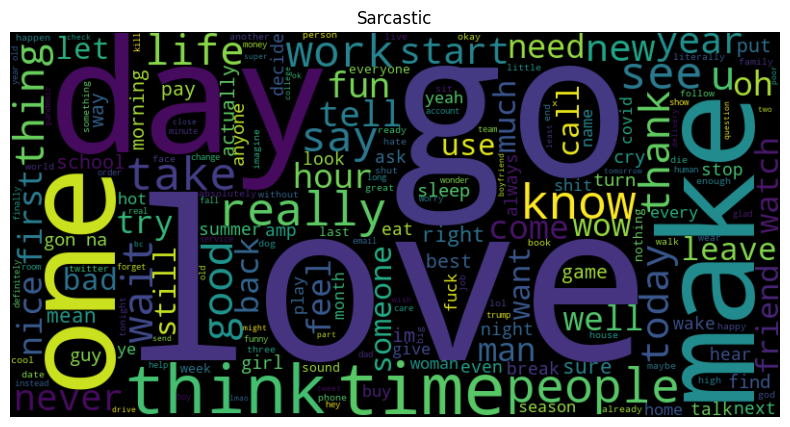

In [11]:
# Combine all sarcastic cleaned tweets into a single text 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
Sarcastic_text = ' '.join( 
    data['Lemma'][data['sarcastic'] == 1].tolist()) 
  
# Import the necessary libraries 
  
# Create a WordCloud object with specified width, height, and background color 
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black').generate(Sarcastic_text) 
  
# Display the WordCloud without axes 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Sarcastic') 
plt.show() 

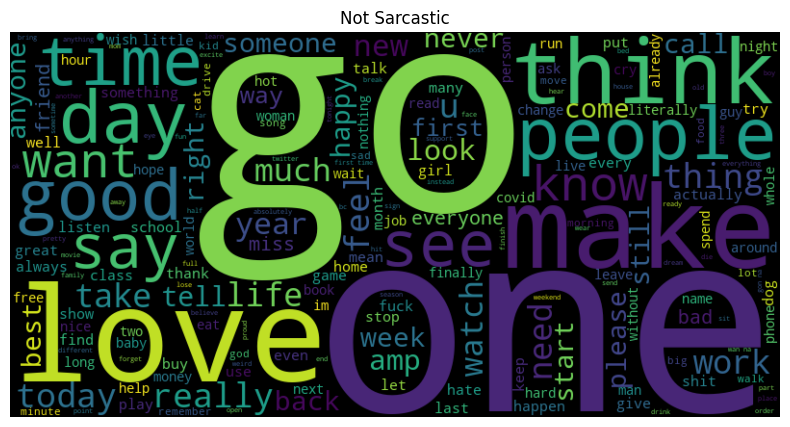

In [12]:
# Combine all non-sarcastic cleaned tweets into a single text 
Non_Sarcastic_text = ' '.join( 
    data['Lemma'][data['sarcastic'] == 0].tolist()) 
  
# Create a WordCloud object with specified width, height, and background color 
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black').generate(Non_Sarcastic_text) 
  
# Display the WordCloud without axes 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Not Sarcastic') 
plt.show() 

In [13]:
data['sarcastic'].value_counts()

sarcastic
0    2601
1     867
Name: count, dtype: int64

In [15]:
X = data[['Lemma']]  
y = data['sarcastic']      

# Initialize RandomOverSampler
ros = RandomOverSampler()

# Perform Random OverSampling
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

# Convert the resampled data to a DataFrame
resampled_df = pd.DataFrame({'Lemma': X_resampled.flatten(), 'sarcastic': y_resampled})

# Check the new count of sarcastic
print(resampled_df['sarcastic'].value_counts())

sarcastic
1    2601
0    2601
Name: count, dtype: int64


In [16]:
resampled_df = resampled_df.sample(frac=1).reset_index(drop=True)

In [17]:
X = resampled_df['Lemma'].values
y = resampled_df['sarcastic'].values

In [18]:
# Split the data into training and test sets
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the test into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_combined, y_combined, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4161,)
X_val shape: (520,)
X_test shape: (521,)
y_train shape: (4161,)
y_val shape: (520,)
y_test shape: (521,)


In [19]:
# Set parameters 
# Max len of unique words 
vocab_size = 10000
  
# Embedding dimension value 
embedding_dim = 200
  
# Max length of sentence 
max_length = 60
  
# pad_sequences arg 
padding_type = 'post'
  
# Unknow words = <OOV> 
oov_tok = '<OOV>'
  
# Tokenizing and padding 
# Create a tokenizer with a specified vocabulary size and out-of-vocabulary token 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) 
# Fit the tokenizer on the training text data to create word-to-index mapping 
tokenizer.fit_on_texts(X_train) 

In [20]:
# Get the word index from the tokenizer 
word_index = tokenizer.word_index 
  
#Printing the word_index 
word_index

{'<OOV>': 1,
 'get': 2,
 'like': 3,
 'go': 4,
 'love': 5,
 'day': 6,
 'one': 7,
 'time': 8,
 'make': 9,
 'people': 10,
 'think': 11,
 'really': 12,
 'good': 13,
 'know': 14,
 'see': 15,
 'say': 16,
 'take': 17,
 'would': 18,
 'year': 19,
 'work': 20,
 'thing': 21,
 'life': 22,
 'today': 23,
 'want': 24,
 'feel': 25,
 'new': 26,
 'watch': 27,
 'need': 28,
 'tell': 29,
 'start': 30,
 'back': 31,
 'every': 32,
 'come': 33,
 'first': 34,
 'wait': 35,
 'never': 36,
 'someone': 37,
 'much': 38,
 'look': 39,
 'try': 40,
 'friend': 41,
 'amp': 42,
 'best': 43,
 'week': 44,
 'still': 45,
 'well': 46,
 'girl': 47,
 'call': 48,
 'right': 49,
 'fun': 50,
 'way': 51,
 'hour': 52,
 'man': 53,
 'anyone': 54,
 'na': 55,
 'last': 56,
 'happy': 57,
 'talk': 58,
 'nice': 59,
 'always': 60,
 'school': 61,
 'bad': 62,
 'u': 63,
 'let': 64,
 'night': 65,
 'put': 66,
 'actually': 67,
 'something': 68,
 'ever': 69,
 'game': 70,
 'even': 71,
 'leave': 72,
 'could': 73,
 'us': 74,
 'everyone': 75,
 'oh': 76,
 '

In [21]:
# Convert training text to sequences of word indices 
tokenizer.texts_to_sequences(X_train[:5])

[[352, 185, 871, 2, 280, 163, 697, 632, 76, 35],
 [257, 398, 27, 1377, 353, 17, 460],
 [235, 2059, 32, 1656, 100, 376, 1001, 698, 1657],
 [59],
 [97, 2713, 101, 1183, 1658, 377, 186, 212, 1378]]

In [22]:
# Tokenize and pad data 
# Convert text data to sequences of word indices 
X_train_indices = tokenizer.texts_to_sequences(X_train) 
# Pad sequences to a fixed length 
X_train_padded = pad_sequences(X_train_indices, 
                             padding=padding_type, 
                             maxlen=max_length) 

In [23]:
# Convert validation text to sequences of word indices 
X_val_indices = tokenizer.texts_to_sequences(X_val) 
# Pad sequences to a fixed length 
X_validation_padded = pad_sequences(X_val_indices, 
                                  padding=padding_type, 
                                  maxlen=max_length) 
  
# Convert test text to sequences of word indices 
X_test_indices = tokenizer.texts_to_sequences(X_test) 
# Pad sequences to a fixed length 
X_test_padded = pad_sequences(X_test_indices, 
                            padding=padding_type, 
                            maxlen=max_length) 
  
# Check 
print('Training vector :', X_train_padded.shape) 
print('Validations vector :', X_validation_padded.shape) 
print('Testing vector :', X_test_padded.shape) 

Training vector : (4161, 60)
Validations vector : (520, 60)
Testing vector : (521, 60)


In [24]:
# Decode the sample training vector 
tokenizer.sequences_to_texts([X_train_padded[0].tolist()]) 

['damn imagine vaxxed get cold lose taste smell oh wait <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [25]:
# Prepare labels for model 
y_train_final = np.array(y_train) 
y_val_final = np.array(y_val) 
y_test_final = np.array(y_test) 
  
  
# Check shapes 
print('Training vector :', y_train_final.shape) 
print('Validations vector :', y_val_final.shape) 
print('Testing vector :', y_test_final.shape) 

Training vector : (4161,)
Validations vector : (520,)
Testing vector : (521,)


In [26]:
# Import the TensorFlow library 
import tensorflow as tf 
  
# Define a sequential neural network model 
model = tf.keras.Sequential([ 
    # Embedding layer for creating word embeddings 
    tf.keras.layers.Embedding(vocab_size, embedding_dim), 
  
    # GlobalMaxPooling layer to extract relevant features 
    tf.keras.layers.GlobalMaxPool1D(), 
  
    # First Dense layer with 40 neurons and ReLU activation 
    tf.keras.layers.Dense(40, activation='relu'), 
  
    # Dropout layer to prevent overfitting 
    tf.keras.layers.Dropout(0.5), 
  
    # Second Dense layer with 20 neurons and ReLU activation 
    tf.keras.layers.Dense(20, activation='relu'), 
  
    # Dropout layer to prevent overfitting 
    tf.keras.layers.Dropout(0.5), 
  
    # Third Dense layer with 10 neurons and ReLU activation 
    tf.keras.layers.Dense(10, activation='relu'), 
  
    # Dropout layer to prevent overfitting 
    tf.keras.layers.Dropout(0.2), 
  
    # Final Dense layer with 1 neuron and sigmoid activation for binary classification 
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model with specified loss function, optimizer, and evaluation metrics 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy']) 

In [28]:
# Set the number of training epochs 
num_epochs = 5
  
# Fit the model to the training data and validate on the validation data 
history = model.fit( 
    X_train_padded, y_train_final, 
    epochs=num_epochs, 
    validation_data=(X_validation_padded, y_val_final) 
) 

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5111 - loss: 0.6932 - val_accuracy: 0.5077 - val_loss: 0.6929
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5344 - loss: 0.6914 - val_accuracy: 0.6885 - val_loss: 0.6767
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6751 - loss: 0.6355 - val_accuracy: 0.7981 - val_loss: 0.4679
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9065 - loss: 0.3295 - val_accuracy: 0.8327 - val_loss: 0.4110
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9739 - loss: 0.1249 - val_accuracy: 0.8346 - val_loss: 0.5601


In [29]:
#predicting the model  
  
y_pred_prob = model.predict(X_test_padded) 
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob] 
y_pred[:5]

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[0, 1, 0, 1, 1]

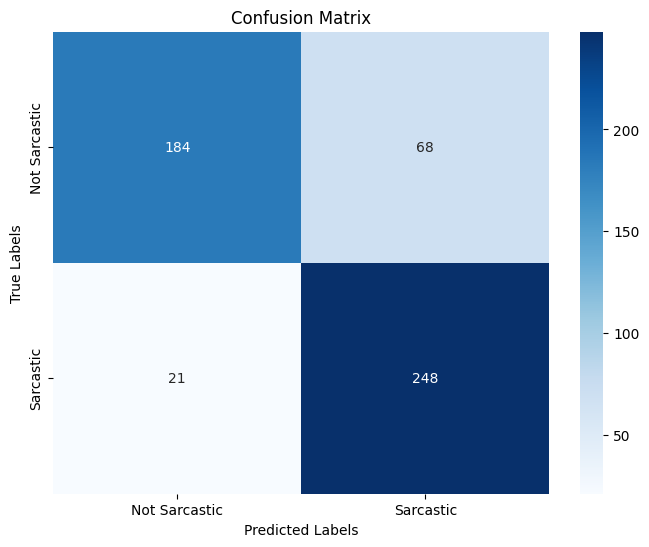

In [30]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_final, y_pred) 
  
# Plot the confusion matrix using a heatmap 
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sarcastic', 'Sarcastic'], 
            yticklabels=['Not Sarcastic', 'Sarcastic']) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('Confusion Matrix') 
plt.show() 

In [31]:
# Print Classification Report 
print("\nClassification Report:") 
print(classification_report(y_test_final, y_pred, 
                            target_names=['Not Sarcastic', 'Sarcastic']))


Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.90      0.73      0.81       252
    Sarcastic       0.78      0.92      0.85       269

     accuracy                           0.83       521
    macro avg       0.84      0.83      0.83       521
 weighted avg       0.84      0.83      0.83       521

